In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from pathlib import Path

In [4]:
# path to directory that contains the data files
base_path = (
    str(Path(os.path.dirname(os.path.realpath("__file__"))).parent) + "/data/example/"
)

## Plot Box and Whisker Plots of Metrics

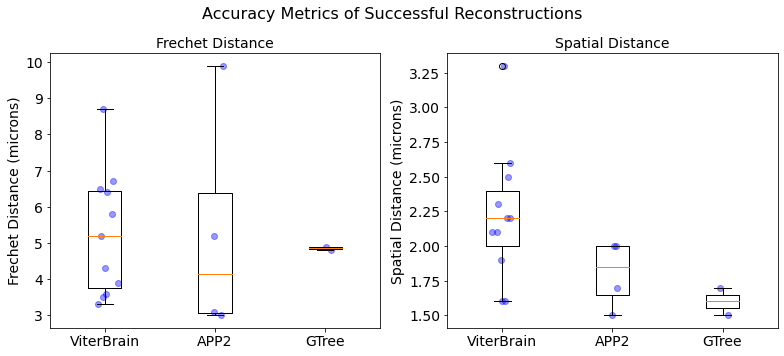

In [5]:
df = pd.read_csv(base_path + "fig7_metrics.csv")

data_frechet = [
    list(df[df["Method"] == method]["Frechet"])
    for method in ["ViterBrain", "APP2", "GTree"]
]
data_sd = [
    list(df[df["Method"] == method]["Spatial Distance"])
    for method in ["ViterBrain", "APP2", "GTree"]
]

fig, axes = plt.subplots(1, 2)
axes[0].set_title("Frechet Distance", fontsize=14)
axes[0].set_ylabel("Frechet Distance (microns)", fontsize=14)
axes[0].boxplot(data_frechet, labels=["ViterBrain", "APP2", "GTree"])
for i in range(3):
    y = data_frechet[i]
    x = np.ones(len(y)) + np.random.normal(i, 0.04, size=len(y))
    axes[0].scatter(x, y, c="b", alpha=0.4)
axes[0].set_xticklabels(["ViterBrain", "APP2", "GTree"], fontsize=14)


axes[1].set_title("Spatial Distance", fontsize=14)
axes[1].set_ylabel("Spatial Distance (microns)", fontsize=14)
axes[1].boxplot(data_sd, labels=["ViterBrain", "APP2", "GTree"])
for i in range(3):
    y = data_sd[i]
    x = np.ones(len(y)) + np.random.normal(i, 0.04, size=len(y))
    axes[1].scatter(x, y, c="b", alpha=0.4)
axes[1].set_xticklabels(["ViterBrain", "APP2", "GTree"], fontsize=14)

plt.sca(axes[0])
plt.yticks(fontsize=14)

plt.sca(axes[1])
plt.yticks(fontsize=14)

fig.set_size_inches(11, 5)
fig.suptitle("Accuracy Metrics of Successful Reconstructions", fontsize=16)
fig.tight_layout()

## Plot Table of Outcomes

/var/folders/fq/9t66hqz51y5ddnygddgjtsmc0000gn/T/ipykernel_32663/2750144931.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df["Method"] == method][df["Outcome"] == "Success"]["Count"].tolist()[0],
/var/folders/fq/9t66hqz51y5ddnygddgjtsmc0000gn/T/ipykernel_32663/2750144931.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df["Method"] == method][df["Outcome"] == "Partial Success"][
/var/folders/fq/9t66hqz51y5ddnygddgjtsmc0000gn/T/ipykernel_32663/2750144931.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df["Method"] == method][df["Outcome"] == "Failure"]["Count"].tolist()[0],


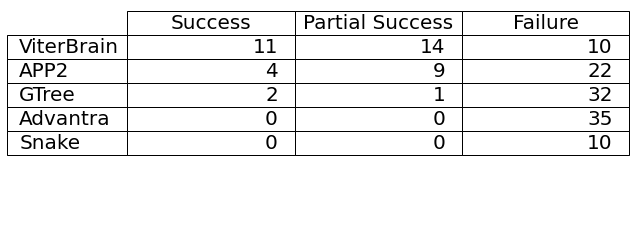

In [6]:
df = pd.read_csv(base_path + "fig7_outcomes.csv")

data = [
    [
        df[df["Method"] == method][df["Outcome"] == "Success"]["Count"].tolist()[0],
        df[df["Method"] == method][df["Outcome"] == "Partial Success"][
            "Count"
        ].tolist()[0],
        df[df["Method"] == method][df["Outcome"] == "Failure"]["Count"].tolist()[0],
    ]
    for method in ["ViterBrain", "APP2", "GTree", "Advantra", "Snake"]
]


for list in data:
    if np.sum(list) not in [10, 35]:
        raise ValueError(f"Only {np.sum(list)} evaluations, not 35")

fig, ax = plt.subplots()
# ax.set_axis_off()
ax.axis("tight")
ax.axis("off")

table = ax.table(
    cellText=data,
    rowLabels=["ViterBrain", "APP2", "GTree", "Advantra", "Snake"],
    colLabels=["Success", "Partial Success", "Failure"],
    loc="upper left",
)
table.auto_set_font_size(False)
table.set_fontsize(20)
table.scale(1.5, 2)

In [7]:
from statsmodels.stats.proportion import proportions_ztest

print("P values for 2 Proportion Z Tests")
print(
    f"Viterbrain vs App2: {proportions_ztest(count=[data[0][0], data[1][0]], nobs=[35, 35])[1]}"
)
print(
    f"Viterbrain vs Snake: {proportions_ztest(count=[data[0][0], data[4][0]], nobs=[35, 10])[1]}"
)
print(
    f"APP2 vs Advantra: {proportions_ztest(count=[data[1][0], data[3][0]], nobs=[35, 35])[1]}"
)
print(
    f"APP2 vs GTree: {proportions_ztest(count=[data[1][0], data[2][0]], nobs=[35, 35])[1]}"
)
print(
    f"APP2 vs Snake: {proportions_ztest(count=[data[1][0], data[4][0]], nobs=[35, 10])[1]}"
)

P values for 2 Proportion Z Tests
Viterbrain vs App2: 0.041448687457663176
Viterbrain vs Snake: 0.041397618661288514
APP2 vs Advantra: 0.039425832629443
APP2 vs GTree: 0.393153437674003
APP2 vs Snake: 0.26272224684071965
